<div class="alert alert-block alert-info">
<b> </b> </div>

<h1 style="text-align: center">Segmenting an online retail company's customers</h1>

<div class="alert alert-block alert-info">
<b> </b> </div>

<h1 style="text-align: center">Part I: ETL Pipeline and Exploratory Data Analysis</h1>


<div class="alert alert-block alert-info">
<b> </b> </div>

# Executive Summary
The goal of this project is to conduct a market segmentation of an online retailer’s market.  Market segmentation is concerned with explaining and understanding the customer’s behaviour. The purpose of market segmentation according to Allenby et al (2002) is to understand and describe customer behaviour to develop a focused customer engagement strategy (Allenby et al., 2002).  
  
During Exploratory Data Analysis it was ascertained that the dataset could effectively be split into two distinct segmentation processes because nearly 40% of transaction were credit transactions. Therefore customers behaviour could be separately grouped based on sales and credit transactions. Evaluating customers based on their purchase history is interesting from a marketing perspective. However further evaluating customers based on their returns and cancellations can provide additional insight about product quality, shipping problems and flag complex customers. 

## Project Objectives

The project objectives were revised and expanded to include:
>1. Segment the market based on customer sales transactions using the RFM segmentation framework (Zhang et al., 2015).
>2. Use k-means clustering to segment the online retail customers based on their purchasing habits.
>3. Use k-means clustering to segment the online retail customers based on their return or order cancellation history
>4. Based on the segments provide a customer transaction profile including a description of the customer purchasing patterns.
>5. Recommend marketing actions to target specific groups off customers based on their market profile.


# RFM marketing analysis model
The dataset was prepared for clustering using the RFM marketing analysis model. Recency, frequency, monetary value (RFM) is a marketing analysis model that segments customers based on their purchasing patterns (Murphy, 2024). 

The model evaluates customers on:
* **Recency:** Duration since last purchase.
* **Frequency:** Number of purchases. One purchase is a transaction that is invoiced. One transaction can include one or more products.
* **Monetary:** How much was paid on invoice. The invoice total is the sum of one transaction which may include more than one product.


# Online Retailer Dataset

This dataset has been sourced from UCI ML Repository:
https://archive.ics.uci.edu/ml/datasets/online+retail

This is a transactional data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.  

Understanding the dataset and its associated business processes is an important part of data preparation. An understanding of business requirements ensures that data processing meets information requirements`(UK Government, 2020)`.   

The raw data consists of eight features and approximately half a million transactions. The eight features are: Invoice Number , Stock Code, Product Description, Quantity Sold, Unit Price, Invoice Date, Customer ID and Country (Customer).   

**Note** The period of this dataset could be considered  outdated. However this dataset was chosen for its many other virtues including sufficient data to enable the analysis of both sales and returns transactions. The dataset was messy with many data transformation challenges. Furthermore transactions are at the lowest level of granularity providing an opportunity for data aggregation and feature engineering. Therefore since date is not a feature that would be used during the analysis the decision was made to accept the dataset based on its merits rather than limitations.

This original dataset contained the following features:  
<table style="float: left">
<thead>
<tr><th>Column</th><th>Description</th></tr>
</thead>
<tbody>
<tr><td> InvoiceNo </td><td> unique invoice identifier </td></tr>
<tr><td> StockCode </td><td> unique product identifier </td></tr>
<tr><td> Description </td><td> product description </td></tr>
<tr><td> Quantity </td><td> item quantity per order line </td></tr>
<tr><td> InvoiceDate </td><td> date of sale (transaction)
</td></tr>
<tr><td> UnitPrice </td><td> unit price </td></tr>
<tr><td> CustomerID </td><td> unique customer ID </td></tr>
<tr><td> Country </td><td> customer’s country </td></tr>
</tbody>
</table>
 

# Business Processes and assumptions about the dataset.

The dataset consists of a limited number of fields in terms of business process therefore it is necessary to make some assumptions about the online retailer’s business processes.
For this project the following assumptions are made:
* A customer places an order with the online retailer by selecting and placing  one or more items in their basket. 
* When the customer checks out the transaction is closed, and the order is processed for `payment on invoice`.
* All items (one item = one instance (row) in the dataset) in the basket are invoiced and the customer pays on invoice.   
* An invoice is the record of the sales transaction.  
* A transaction is associated with an invoice number. The number of transactions is reflected by the number of unique invoice numbers.  
* The count of sales transactions is reflected by the number of invoices `NOT` the number of items that a customer purchases.
* If an order is cancelled or returned  (in part or in full) a credit invoice is issued.  
* A credit invoice has a 'C' and refunds or adjustments have a 'A' prefix and is shown as a negative number in the dataset.  

<div class="alert alert-block alert-info">
<b> </b> </div>

<h1 style="text-align: center">Extract Transform and Load (ETL Pipeline)</h1>

<div class="alert alert-block alert-info">
<b> </b> </div>

## Preprocessing in Excel
Using `Power Query in Excel` is advantageous to process and engineer two new features in Excel. Excel was used to showcase the use of other data engineer tools and techniques that are available to a data scientist.  

The original csv file was processed in Excel and the following data preparation tasks completed using Power Query:
>* Duplicated the `InvoiceNo` column (`Inv_No`) and removed the `“C” prefix from the credit invoice number` so that all invoice numbers in the `Inv_No` column were numeric.
>* Numeric columns trimmed and cleaned to remove white spaces.
>* Data types corrected.
>* Surplus fields were removed as they were not required for this project.

Two new features `Credit` and `Recency` were added to the dataset:
>* Added a new feature `Credit` which identifies if an invoice number is a sales invoice (`T.Invoice`) or a credit invoice (`C.Invoice`).
>* Added a new feature `Recency` which calculates the duration is days from the max data in the dataset to the date of the customers last transaction.

**Added a new feature 'Credit' using M-Code in Power Query**  
  
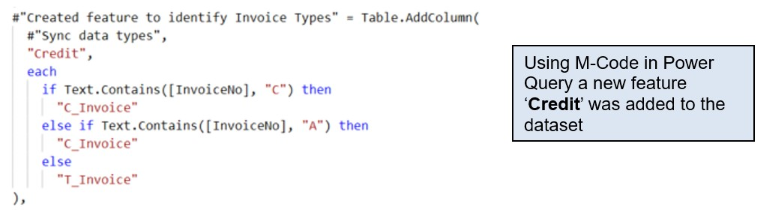
  
**Added a second feature 'Recency'using M-Code in Power Query**
By calculating the max date in the dataset and then subtracting the transaction date it was possible to calculate how many days since the last transaction. 

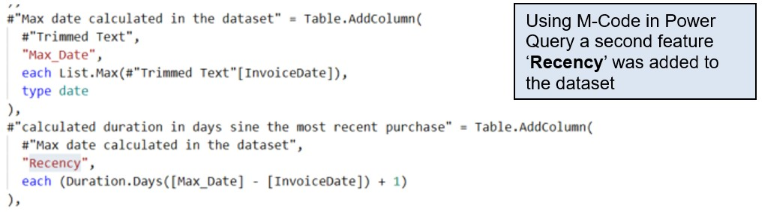


<div class="alert alert-block alert-info">
<b> </b> </div>

## Data Pipeline

<div class="alert alert-block alert-info">
<b> </b> </div>

The data pipeline for this project is uncomplicated. The dataset csv file was downloaded from Kaggle.com, processed in Excel using Power Query read into a JupyterLab notebook and further processed using Python and Pandas. The completed project and datafile were then loaded into a repository in GitHub for consumption by the end user.

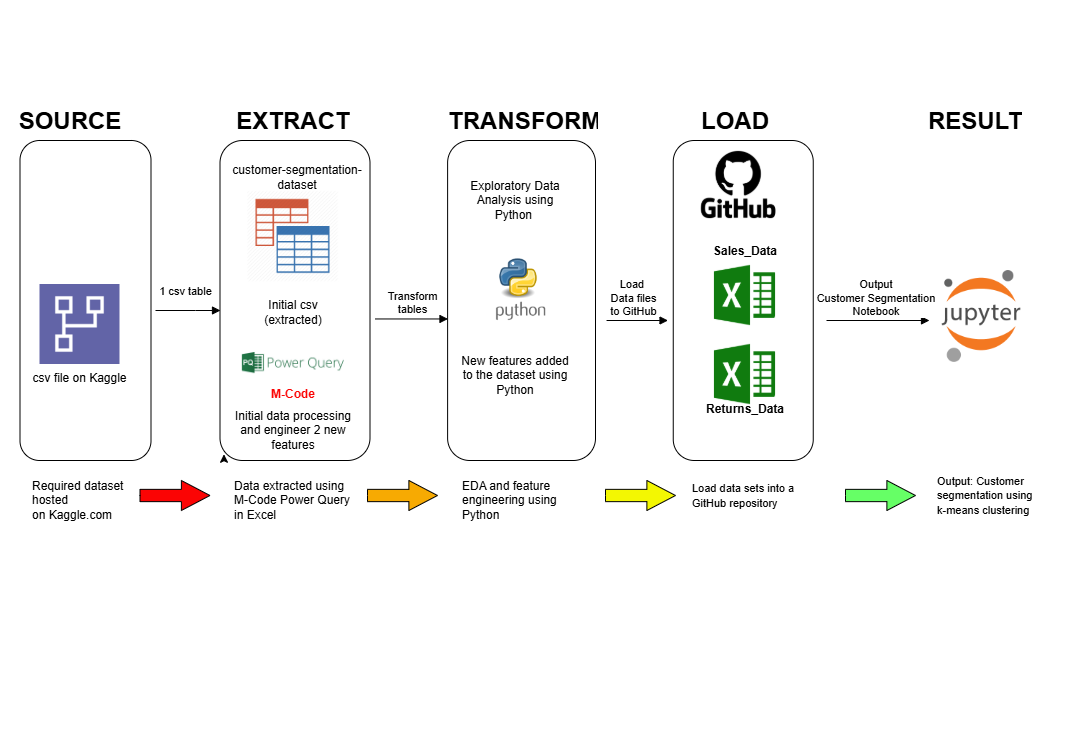

<div class="alert alert-block alert-info">
<b> </b> </div>

## Importing the Python Packages
Import the required Python packages.

In [2]:
import pandas as pd
import numpy as np
from functools import reduce
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set_theme()
sns.set(font_scale=2)
sns.set(rc={"figure.figsize":(12, 8)}) #width=6, height=5
from scipy.stats import pearsonr # import pearsonr function to calculate  Pearson correlation coefficient
from scipy.stats import chi2
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## Collect the Data
Import the data into a dataframe called `df`.

In [3]:
df = pd.read_excel("C:/Users/ke337467/OneDrive - Oxfordshire County Council/Data Scientist Apprenticeship/\
Module Portfolio - Data Science Professional Practice/Retail_Market/Online_Retail_MASTER.xlsx")

## Inspect the data set

To verify that the import worked as expected, preview the data using the `.shape` and `.sample()` methods.

In [4]:
df.shape

(541909, 11)

In [5]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Credit,Inv_No,Recency
28589,538646,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-13,3.75,17293.0,United Kingdom,T_Invoice,538646,362
358415,568146,23200,JUMBO BAG PEARS,10,2011-09-25,2.08,16169.0,United Kingdom,T_Invoice,568146,76
52765,540817,22855,FINE WICKER HEART,12,2011-01-11,1.25,14209.0,United Kingdom,T_Invoice,540817,333
388184,570420,21927,BLUE/CREAM STRIPE CUSHION COVER,6,2011-10-10,1.25,17841.0,United Kingdom,T_Invoice,570420,61
448385,575051,22751,FELTCRAFT PRINCESS OLIVIA DOLL,2,2011-11-08,3.75,15957.0,United Kingdom,T_Invoice,575051,32


Further exploration of the dataset was conducted in Pandas to understand the structure and content of the data.  
First check the data set for any missing data

In [6]:
df.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Credit              0
Inv_No              0
Recency             0
dtype: int64

There are `135,080` missing Customer ID’s out of a total of `541,909` instances <span style="color:red">**(25%)**</span>. This is most likely a result of cancelled orders, returns or guest purchases. This is a large dataset therefore the instances with missing values are dropped.

The first problem encountered is missing values. The `Description` feature has `1,454` values. The `Description` feature is not required for the clustering as the focus of the clustering is on customer behaviour and not on products. Therefore instead of removing records based on missing values in the `Description` feature the feature itself is removed.
Furthermore, the  `StockCode` feature is another text heavy features that is not required for clustering.

<div class="alert alert-block alert-warning">
<b>Note:</b>  Text heavy features such as <i>Description</i> and <i>StockCode</i> are best removed early in the process because they slow down  data processing. Text data cannot be compressed as efficiently as numeric data and are therefore removed from the data frame as early as possible.</div>

In [7]:
df = df.drop(['StockCode', 'Description'], axis=1)

There are `135,080` missing Customer ID’s out of a total of `541,909` instances <span style="color:red">**(25%)**</span>. This is most likely a result of cancelled orders, returns or guest purchases. Therefore the instances with missing values are dropped because without a Customer ID the data is not usable or this project.

In [8]:
df.dropna(inplace=True)

Next return a concise summary of the structure and the data types within the dataset to evaluate the current status of the data frame.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   Quantity     406829 non-null  int64         
 2   InvoiceDate  406829 non-null  datetime64[ns]
 3   UnitPrice    406829 non-null  float64       
 4   CustomerID   406829 non-null  float64       
 5   Country      406829 non-null  object        
 6   Credit       406829 non-null  object        
 7   Inv_No       406829 non-null  int64         
 8   Recency      406829 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 31.0+ MB


A review of the data structure illustrates that almost everything is as it should be expect `Customer ID` which is a float instead of an integer. Set `Customer ID` to integer data type.

In [10]:
df['CustomerID'] = df['CustomerID'].astype('int64')

### Add Total Price feature to the data set
Calculate the total amount of each item purchased (total price = quantity x unit price).

In [11]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

## Data Frame Summary

There are 406,829 instances (or rows) in the dataset.  

The dataset consists of 9 features (or fields). Note that the `InvoiceNo` feature is an object (mixed data type because the field contains text and numerical data ), `Quantity`, `Inv_No` and `Recency` are integer and `InvoiceDate` is a date type.  

Summary statistics for the numeric features in the data by calling the `describe()` method.

**Note:** The summary statistics can be neatened by including a `round function` to round all number to a specified number of places.

In [12]:
df.describe().round(2)

,Quantity,UnitPrice,CustomerID,Inv_No,Recency,TotalPrice
count,406829.00,406829.00,406829.00,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69,560581.74,152.86,20.40
std,248.69,69.32,1713.60,13105.44,112.85,427.59
min,-80995.00,0.00,12346.00,536365.00,1.00,-168469.60
25%,2.00,1.25,13953.00,549130.00,51.00,4.20
50%,5.00,1.95,15152.00,561873.00,132.00,11.10
75%,12.00,3.75,16791.00,572065.00,248.00,19.50
max,80995.00,38970.00,18287.00,581587.00,374.00,168469.60


<div class="alert alert-block alert-info">
<b> </b> </div>

<h1 style="text-align: center">Exploratory Data Analysis (EDA)</h1> 


<div class="alert alert-block alert-info">
<b> </b> </div>

## Resolving the presence of credit invoices within the data set.

### Dealing with outliers
A review of the data frame statistics reveals that there is a problem in the <span style="color:red"> Quantity </span>feature. The min `Quantity` = -80995.00 and the max `Quantity` = 80995.00.  
  
This is most likely a <span style="color:blue">sale cancellation, product return or credit reversal</span>.  
  
Returning the two records where:  
>`Quantity` = <span style="color:red">-80995</span>   
>`Quantity` = <span style="color:green">  80995</span>   

This data will enable a closer review of the records and determine hoe to resolve the error. 

In [13]:
outlier = df[(df['Quantity'] >= 80995) | (df['Quantity'] <= -80995)]
outlier

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Credit,Inv_No,Recency,TotalPrice
540421,581483,80995,2011-12-09,2.08,16446,United Kingdom,T_Invoice,581483,1,168469.6
540422,C581484,-80995,2011-12-09,2.08,16446,United Kingdom,C_Invoice,581484,1,-168469.6


Evaluating these two records it is possible to deduce that this is most likely a cancelled transaction as the invoice with the negative quantity is a credit invoice donated by the `C` prefix. Furthermore the invoices numbers are sequential, the Invoice dates are identical and the invoices details are the same.

### Determine how many credit invoices are there in the datset?

In [14]:
def find_prefix_freq(string, prefix):
    count = 0
    for string in string:
        try: 
            if string.startswith(prefix):
                count += 1
        except AttributeError:
            pass
    return count

prefix = "C"
string = df["InvoiceNo"]

In [15]:
Invoice_Type = df['Credit'].value_counts()
Invoice_Type

T_Invoice    397924
C_Invoice      8905
Name: Credit, dtype: int64

There are `8,905 credit invoices` in the dataset. The total sample at this stage is `406,829 records` <span style="color:red">but one record does not equal one transaction.</span> An invoice covers all the items in one sale transaction. Therefore if all the records are grouped by invoice number there are `4,339 sales invoices` and `1,589 credit invoices`. 
  
Therefore <span style="color:red">36.6%</span> of all transactions are  actually credit transactions.

<div class="alert alert-block alert-info">
<b> </b> </div>

## A fork in the road
With such a high proportion of credit invoices we must investigate this phenomenon further since ignoring credit invoices or assuming that a credit invoice will automatically cancel out a corresponding sales transaction would distort the segmentation and by extension the customer profile.

As discussed in the `Executive Summary` it was at this point in the Exploratory Data Analysis that it was ascertained that the dataset could effectively be split into two distinct segmentation processes because <span style="color:red">37%</span> of transactions were credit transactions. An evaluation of the how others tackled this dataset on `Kaggle.com` revealed that a alarming number of users chose to ignore the credit invoices completely and treat each record as a transaction. Customer transactions were not aggregated and in most cases the clustering was done based on row level data.

In my opinion the approach used by many on Kaggle would not be an acceptable solution to the clustering question and it would not provide the necessary insight to understand customer behaviour. Therefore the decision was taken as discussed in the section `Business Processes and assumptions about the dataset` to separate sales transaction from credit transactions and undertake two segmentations one based on `sales transactions` and the other on `credit transactions`

### Does a credit invoice cancel a corresponding purchase transaction?

The objective of the project is to cluster customers based on the `RFM marketing analysis model` where the model evaluates customers on:

>* `Recency`: Duration since last purchase.
>* `Frequency`: Number of purchases.
>* `Monetary`: How much they spend.

Credit invoices are **not purchase transactions** therefore <span style="color:red">
**leaving the credit invoice in the dataset will incorrectly inflate the number of purchases** </span>and distort the `Frequency`count. Credit invoices will also affect the `Monetary` value in terms of how much a customer spent and potentially also influence the `Recency` calculation depending when the credit invoice was issued in relation the last purchase transaction. Theoretically in terms of the `Monetary` value this does not matter in many cases because a cancelled transaction is reversed by a credit invoice as indicated in the case of `CustomerID = 16446` (see `Example 2: Review of Customer ID = 16446` below for net transactions of customer 16446). 
  
**BUT** in terms `Frequency`  and counting the number of purchases that a customer made then <span style="color:blue">cancelled transactions and credit invoices do matter</span> and need to be resolved.
  
At this point in the analysis the question that demands an answer is whether all `credit invoices` <span style="color:blue"> are reversing a corresponding purchase transaction? </span>

## Review of two customer transaction records.

### Example 1: Review of Customer ID = 14501
Below is the record of Customer ID = `14501`

In [16]:
df14501 = df[df['CustomerID'] == 14501]
print(df14501.to_string())

       InvoiceNo  Quantity InvoiceDate  UnitPrice  CustomerID         Country     Credit  Inv_No  Recency  TotalPrice
68916     541881         6  2011-01-24       2.95       14501  United Kingdom  T_Invoice  541881      320       17.70
68917     541881        12  2011-01-24       1.65       14501  United Kingdom  T_Invoice  541881      320       19.80
68918     541881         3  2011-01-24       6.45       14501  United Kingdom  T_Invoice  541881      320       19.35
68919     541881        24  2011-01-24       0.42       14501  United Kingdom  T_Invoice  541881      320       10.08
220426    556191        16  2011-06-09       1.69       14501  United Kingdom  T_Invoice  556191      184       27.04
220427    556191        16  2011-06-09       1.69       14501  United Kingdom  T_Invoice  556191      184       27.04
220428    556191        12  2011-06-09       2.95       14501  United Kingdom  T_Invoice  556191      184       35.40
220429    556191        24  2011-06-09       1.45       

The 12 records comprise 2 orders and 1 credit.  
Next is a summary of Customer ID (`14501`) transations

In [17]:
df14501_Grouped = df14501.drop(columns=['Country','CustomerID','UnitPrice','Inv_No']).groupby('InvoiceNo').sum()
df14501_Grouped

,Quantity,Recency,TotalPrice
InvoiceNo,,,
541881,45,1280,66.93
556191,116,1104,184.28
C569991,-42,130,-60.90


### Evaluation of Example 1 Customer ID = 14501 transactions

Invoice number `541881` was for `45` items totalling `66.93`.  
  
The credit invoice `C569991` is for `42` items (presumably returned) and a credit of `60.93`.  
  
Therefore this customer made two purchases for a total of (`184.28 + 66.93 – 60.90 = 190.31`).



### Example 2: Review of Customer ID = 16446
Below is the record of Customer ID = `16446`

In [18]:
df16446 = df[df['CustomerID'] == 16446]
print(df16446.to_string())

       InvoiceNo  Quantity InvoiceDate  UnitPrice  CustomerID         Country     Credit  Inv_No  Recency  TotalPrice
194354    553573         1  2011-05-18       1.65       16446  United Kingdom  T_Invoice  553573      206        1.65
194355    553573         1  2011-05-18       1.25       16446  United Kingdom  T_Invoice  553573      206        1.25
540421    581483     80995  2011-12-09       2.08       16446  United Kingdom  T_Invoice  581483        1   168469.60
540422   C581484    -80995  2011-12-09       2.08       16446  United Kingdom  C_Invoice  581484        1  -168469.60


The 4 records comprise 2 orders and 1 credit.  
Next is a summary of Customer ID (`16446`) transations

In [19]:
df16446_Grouped = df16446.drop(columns=['Country','CustomerID','UnitPrice','Inv_No']).groupby('InvoiceNo').sum()
df16446_Grouped

,Quantity,Recency,TotalPrice
InvoiceNo,,,
553573,2,412,2.9
581483,80995,1,168469.6
C581484,-80995,1,-168469.6


### Evaluation of Example 2 Customer ID = 16446 transactions
Invoice number `553573` was for `2` items totalling `2.90`.

Invoice number  `581483` was for  `80,995` items totalling  `168,469.60`.

The credit invoice `C569991` is for all `80,995` items (presumably returned) and a credit of  ``-168,469.60` was issued. These two transactions cancel each other out.

Therefore this customer made one purchase for a total of (`2.90`).

### Summary of the 4 example customers with their net transactions
Two further customers were evacuated (details not illustrated to avoid too much repetition and reader fatigue.) However they are all included in the summary table below.

<table style="float: left">
<thead>
<tr><th>Customer ID</th><th>Orders</th><th>Credits</th><th>Net Transactions</th></tr>
</thead>
<tbody>
<tr><td>14501</td><td>2</td><td>1</td><td>1</td></tr>
<tr><td>16446</td><td>2</td><td>1</td><td>1</td></tr>
<tr><td>17548</td><td>1</td><td>2</td><td>-1</td></tr>
<tr><td>12347</td><td>7</td><td>0</td><td>7</td></tr>
</tbody>
</table>

<div class="alert alert-block alert-danger">
<b>Notice:</b> that <i>Customer ID = 17548</i> has a negative number of transactions which makes this customer a <i>creditor</i>. This is another example of why sales and returns/cancelled orders (credits) should not be treated in the same segmentation process as the credits can adversely affect the customer behaviour profile. </div>

<div class="alert alert-block alert-info">
<b> </b> </div>

## Granularity and why it matters
In the examples above the credit transactions do not cancel out any previous transaction as some, but not all items, have been returned. This justifies my position **not** to treat the segmentation at the `item` level of granularity but to rather aggregate the dataset to the `transaction` level of granularity.

Segmenting at the `transaction level` will provide a more realistic profile of customer purchasing behaviour. It will also provide insight into the role that returns, canellations and credits played in the overall business processes. Granularity matters and in this dataset, it is critically important to establish the segmentation at the appropriate level of granularity.


<div class="alert alert-block alert-info">
<b> </b> </div>

## Conclusion and proposed solution
Transaction invoices and credit invoices are at the `item level of granularity`. One invoice (transaction or credit) includes `one or more items in a single transaction`. Since the objective of the project is to cluster customers based on sales transactions the appropriate level of granularity would be the `transaction level`. 
  
Therefore the dataset will be summarised to the `transaction level`. 
  
Credit invoices will be removed from the dataset as a credit is <span style="color:red">**not**</span> a sales transaction but could provide some insight into the habits of customers who frequently cancel or return items. 
  
Due to the limited amount of data in the dataset it is not possible to remove the credit invoices <span style="color:red">**AND**</span> the associated sales transaction as there is no identifier between sales and credit transactions. (This normally would have been an `order number`, but unfortunately this dataset <span style="color:red">does not contain order numbers</span>)

Given the limited amount of business process data in the dataset a compromised solution is provided.

>* Split the dataset into `sales transactions` (knowing that some sales may be invalid as the transactions were cancelled but there is no appropriate way of removing the associated `sale transactions`). 
>* Undertake `market segmentation on sales transactions` to gain an <span style="color:green">understanding of customer purchasing habits</span>. 
>* Undertake a `market segmentation on credit invoices` to gain an <span style="color:green">insight about customers who return items or cancel transactions</span>.
  

**Note:** that the total sales amount per customer and possibly the most recent date <span style="color:red">may not be totally accurate</span> for any customer who also received a credit invoice will be affected in several ways:  
  
>* The credit invoice could be the most recent transaction this affecting the `Recency` element of the study. The credit invoices will be removed from the sales dataset this resolving to some degree this problem.
>* Removing the credit invoice or items that were cancelled or returned cannot be offset by removing the sales transaction since there is no link between the sales transaction and the credit invoices. Customers who have a credit invoice will be impacted in terms of the `Monetary` value: The amount they spend with be incorrect.
>* Removing  credit invoices will reduce the `Frequency` count in the dataset since credit transactions are no longer considered. However the sales transaction associated with the return or cancellation will still be included which is technically an unavoidable error.


<div class="alert alert-block alert-info">
<b> </b> </div>

<h1 style="text-align: center">Feature engineering and data frame creation</h1> 
<h1 style="text-align: center">(A) Creating the Sales data frame</h1> 
 

<div class="alert alert-block alert-info">
<b> </b> </div>

 ## Create the Sales data frame (remove all credit transactions)

In [21]:
dfsales = df[df["Credit"].str.contains("C_Invoice")==False]
dfsales

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Credit,Inv_No,Recency,TotalPrice
0,536365,6,2010-12-01,2.55,17850,United Kingdom,T_Invoice,536365,374,15.30
1,536365,6,2010-12-01,3.39,17850,United Kingdom,T_Invoice,536365,374,20.34
2,536365,8,2010-12-01,2.75,17850,United Kingdom,T_Invoice,536365,374,22.00
3,536365,6,2010-12-01,3.39,17850,United Kingdom,T_Invoice,536365,374,20.34
4,536365,6,2010-12-01,3.39,17850,United Kingdom,T_Invoice,536365,374,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,12,2011-12-09,0.85,12680,France,T_Invoice,581587,1,10.20
541905,581587,6,2011-12-09,2.10,12680,France,T_Invoice,581587,1,12.60
541906,581587,4,2011-12-09,4.15,12680,France,T_Invoice,581587,1,16.60
541907,581587,4,2011-12-09,4.15,12680,France,T_Invoice,581587,1,16.60


## Create the features for the Sales data frame for clustering

### Create Amount (Monetary) feature for the Sales data frame

In [22]:
dfp = dfsales.groupby(['CustomerID'])['TotalPrice'].sum().reset_index()
dfp.rename(columns = {'TotalPrice':'Amount'}, inplace = True)


### Create Frequency feature for the Sales data frame
Group by customer ID and take a distinct count of sales invoices to generate the `Frequency` count of sales per customer

In [23]:
dff = dfsales.groupby(['CustomerID'])['Inv_No'].nunique().reset_index()
dff.rename(columns = {'Inv_No':'Frequency'}, inplace = True)

### Create Recency feature for the Sales data frame
Group by customer ID and return the number of days since their last transaction to generate the `Recency` per customer

In [24]:
dfr = dfsales.groupby(['CustomerID'])['Recency'].min().reset_index()

### Consolidate the Sales data frame (using joins)
Use the join method to join the three sub data frames into a single data frame ready for clustering

In [25]:
sales = [dfp, dff, dfr]
dfs = reduce(lambda  left,right: pd.merge(left,right,on=['CustomerID'], how='outer'), sales)
dfs

,CustomerID,Amount,Frequency,Recency
0,12346,77183.60,1,326
1,12347,4310.00,7,3
2,12348,1797.24,4,76
3,12349,1757.55,1,19
4,12350,334.40,1,311
...,...,...,...,...
4334,18280,180.60,1,278
4335,18281,80.82,1,181
4336,18282,178.05,2,8
4337,18283,2094.88,16,4


## Visual analysis of online retail sales

### Visual exploration of the Sales data frame 

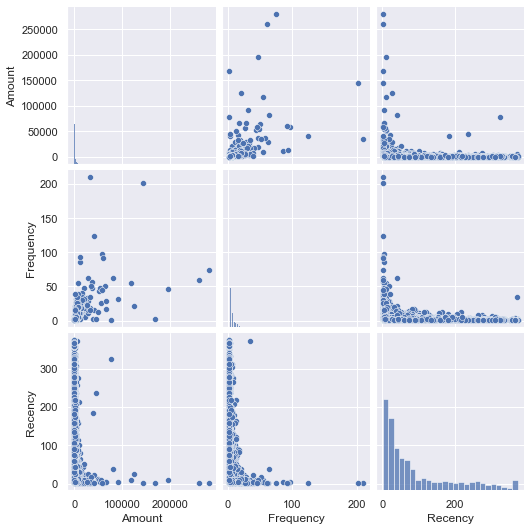

In [26]:
sns.pairplot(dfs[['Amount','Frequency','Recency']])

The pairs plot demonstrates that there is a wide range in the:  
  
>* amount of sales per transaction  
>* frequency of transactions  
  
These need to be investigated statistically

### Further statistical analysis of the Sales data frame

In [27]:
dfs.describe()

,CustomerID,Amount,Frequency,Recency
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,2053.793018,4.271952,93.041484
std,1721.889758,8988.248381,7.705493,100.007757
min,12346.000000,0.000000,1.000000,1.000000
25%,13812.500000,307.245000,1.000000,18.000000
50%,15299.000000,674.450000,2.000000,51.000000
75%,16778.500000,1661.640000,5.000000,142.500000
max,18287.000000,280206.020000,210.000000,374.000000


In the three features `Amount`, `Frequency` and `Recency` it is evident that there is a wide range within the features. This needs to be explored further by measuring the range of each feature. 

In [28]:
def calc_range(x):
    return np.max(x) - np.min(x)

In [29]:
ar=calc_range(dfs['Amount'])
print(f'The range of sales amount between customers is {ar}')

The range of sales amount between customers is 280206.02


In [30]:
af=calc_range(dfs['Frequency'])
print(f'The range of sales frequency between customers is between 1 and {af} purchases')

The range of sales frequency between customers is between 1 and 209 purchases


In [31]:
ar=calc_range(dfs['Recency'])
print(f'The range of days since last purchase ranges from yesterday to {ar} days ago')

The range of days since last purchase ranges from yesterday to 373 days ago


## Sales data frame: Identifying outliers, testing statistical significance and then removing identified outliers
The pair plots and the statistics of the sales features demonstrates there is wide range between datapoints across all three variables namely `Amount`, `Frequency` and `Recency`.   
  
This problem can be resolved by:  

>1.Identify `outliers` using the `Mahalanobis distance` (distance between two points in a multivariate space) and remove them from the dataset.  
>2.Determine which Mahalanobis distances are `statistically significant`, by calculating their `p-values`.  
>3.If the `p-value that is less than .001 then it is considered an outlier` and is removed from the dataset.  

Theory Source:https://www.statisticshowto.com/mahalanobis-distance/   
Python Code pattern: https://www.statology.org/mahalanobis-distance-python/  

### Calculate Mahalanobis distances (Sales)
**Step 1:** create a function to calculate Mahalanobis distance

In [32]:
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(dfs)
    if not cov:
        cov = np.cov(dfs.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

**Step 2:** create new column in dataframe that contains Mahalanobis distance for each row

In [33]:
dfs['Mahalanobis'] = mahalanobis(x=dfs, data=dfs[['Amount', 'Frequency', 'Recency']])

**Step 3:** calculate p-value for each mahalanobis distance

In [34]:
dfs['p_value'] = 1 - chi2.cdf(dfs['Mahalanobis'], 2)
# degrees of freedom = k-1 , where k = number of variables. dfs has three variables therefore k = 2
dfs.head()

,CustomerID,Amount,Frequency,Recency,Mahalanobis,p_value
0,12346,77183.60,1,326,113.497584,0.000000
1,12347,4310.00,7,3,3.744061,0.153811
2,12348,1797.24,4,76,2.973629,0.226092
3,12349,1757.55,1,19,3.957270,0.138258
4,12350,334.40,1,311,7.763645,0.020613


**Step 4:** Remove the outliers. An outlier is classified as any record where the  p-value is less than 0.001. The first record CustomerID = 12346 has a Recency of 326 days and a p-value of 0.000 indicating that this is a potential outlier.

In [35]:
dfs = dfs[dfs.p_value >= 0.001]
dfs.head()

,CustomerID,Amount,Frequency,Recency,Mahalanobis,p_value
1,12347,4310.00,7,3,3.744061,0.153811
2,12348,1797.24,4,76,2.973629,0.226092
3,12349,1757.55,1,19,3.957270,0.138258
4,12350,334.40,1,311,7.763645,0.020613
5,12352,2506.04,8,37,3.411999,0.181591


**Step 5:** Run the pair plot again and verify that that outliers have been removed from the dataset 

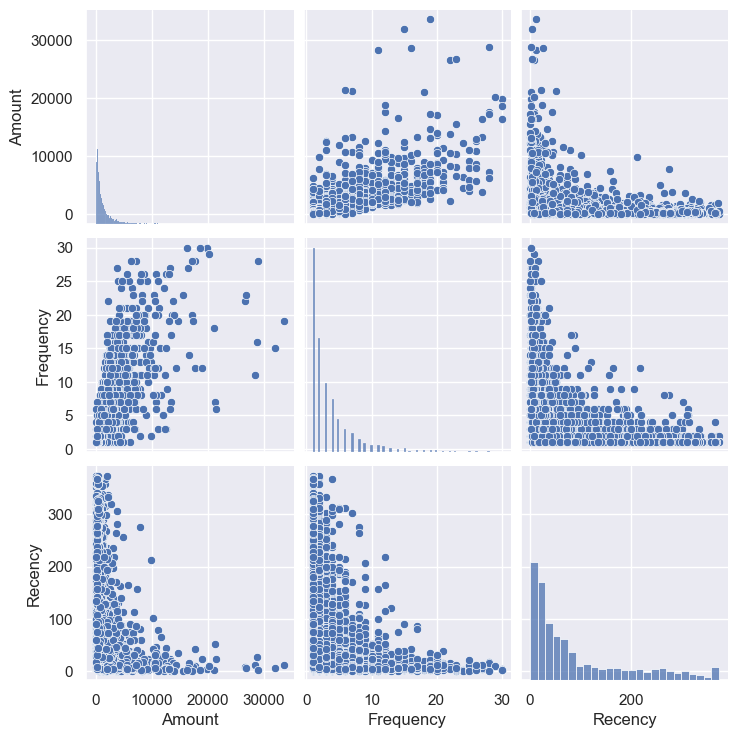

In [36]:
sns.pairplot(dfs[['Amount','Frequency','Recency']])

## Prepare the sales data for clustering

<div class="alert alert-block alert-warning">
<b>Note:</b> Outliers have been removed from the Sales data frame. However the problem of a wide range in the features could still be a problem. Review the descriptive statistics of the data frame.
</div>

In [37]:
dfs[['Amount','Frequency','Recency']].describe().round(1)

,Amount,Frequency,Recency
count,4286.0,4286.0,4286.0
mean,1435.9,3.7,93.9
std,2381.6,4.1,100.0
min,0.0,1.0,1.0
25%,305.6,1.0,19.0
50%,661.8,2.0,52.0
75%,1603.9,4.0,144.0
max,33643.1,30.0,374.0


### Range observations:
All three variables demonstrate a significant range in the amount data that will need to be resolved.
* The standard deviation for `Amount` is `2381.6`. 
* The standard deviation for `Recency` is `100.0`.
* The standard deviation for `Frequency` is `4.1`.
* k-means clustering uses Euclidean distance to quantify similarity. The problem with these three features is that if unresolved the `Amount` feature will dominate the distance calculations. Thus `Frequency` or `Recency` will have little if any impact on the clustering process.
* The resolution is to normalise (or standardise) the data in these three features.
* Standardisation rescales the fields to have a mean of 0 and a standard deviation of 1.

### Normalise (or standardise) the data in the three features
Use the `scaler.fit_transform method` from the sklearn.preprocessing subpackage to standerdise the `Amount`, `Frequency` and `Recency` fields.

In [38]:
dfss = scaler.fit_transform(dfs[['Amount','Frequency','Recency']])
print(dfss[0:5]) # print the first five elements in the array

[[ 1.20694965  0.8015478  -0.90870277]
 [ 0.15174115  0.06690516 -0.17862215]
 [ 0.13507373 -0.66773749 -0.7486851 ]
 [-0.46256392 -0.66773749  2.17163737]
 [ 0.44939464  1.04642868 -0.56866522]]


The scaler transformation returns a NumPy array that needs to be converted to a data frame (for convenience).

In [39]:
dfss = pd.DataFrame(dfss, columns = ['Amount','Frequency','Recency'])
dfss.rename(columns = {'Amount':'Amount_S', 'Frequency':'Frequency_S', 'Recency':'Recency_S'}, inplace = True)
dfss.head()

,Amount_S,Frequency_S,Recency_S
0,1.206950,0.801548,-0.908703
1,0.151741,0.066905,-0.178622
2,0.135074,-0.667737,-0.748685
3,-0.462564,-0.667737,2.171637
4,0.449395,1.046429,-0.568665


### The standardised values in Amount, Frequency and Recency.
Reviewing the data frame above note that `Amount`, `Frequency` and `Recency` have a standard deviation of one and a mean of zero. (The approach is Z-score normalization).

Drop the `Mahalanobis` and `p_value` fields as they are not required for the clustering

In [40]:
dfs = pd.merge(dfs, dfss, left_index=True, right_index=True)

In [41]:
dfs = dfs.drop(['Mahalanobis', 'p_value'], axis=1)
dfs.head()

,CustomerID,Amount,Frequency,Recency,Amount_S,Frequency_S,Recency_S
1,12347,4310.00,7,3,0.151741,0.066905,-0.178622
2,12348,1797.24,4,76,0.135074,-0.667737,-0.748685
3,12349,1757.55,1,19,-0.462564,-0.667737,2.171637
4,12350,334.40,1,311,0.449395,1.046429,-0.568665
5,12352,2506.04,8,37,-0.565617,-0.667737,1.111520


<div class="alert alert-block alert-info">
<b> </b> </div>

<h1 style="text-align: center">(B) Create the Returns data frame</h1> 

<div class="alert alert-block alert-info">
<b> </b> </div>

## Create the Returns data frame (ONLY credit transactions)

In [42]:
dfcredit = df[df["Credit"].str.contains("T_Invoice")==False]
dfcredit

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Credit,Inv_No,Recency,TotalPrice
141,C536379,-1,2010-12-01,27.50,14527,United Kingdom,C_Invoice,536379,374,-27.50
154,C536383,-1,2010-12-01,4.65,15311,United Kingdom,C_Invoice,536383,374,-4.65
235,C536391,-12,2010-12-01,1.65,17548,United Kingdom,C_Invoice,536391,374,-19.80
236,C536391,-24,2010-12-01,0.29,17548,United Kingdom,C_Invoice,536391,374,-6.96
237,C536391,-24,2010-12-01,0.29,17548,United Kingdom,C_Invoice,536391,374,-6.96
...,...,...,...,...,...,...,...,...,...,...
540449,C581490,-11,2011-12-09,0.83,14397,United Kingdom,C_Invoice,581490,1,-9.13
541541,C581499,-1,2011-12-09,224.69,15498,United Kingdom,C_Invoice,581499,1,-224.69
541715,C581568,-5,2011-12-09,10.95,15311,United Kingdom,C_Invoice,581568,1,-54.75
541716,C581569,-1,2011-12-09,1.25,17315,United Kingdom,C_Invoice,581569,1,-1.25


## Create the features for the Returns (credit) data frame for clustering

### Create Amount (Monetary) feature 
Group and sum credit transactions to generate the total credit `Amount` per customer.  
**NOTE:** the `Amount` feature is converted into a positive number by multiplying the `Amount`  by -1

In [43]:
dfpc = dfcredit.groupby(['CustomerID'])['TotalPrice'].sum().reset_index()
dfpc.rename(columns = {'TotalPrice':'Amount'}, inplace = True)
dfpc['Amount'] = dfpc['Amount'] * -1


### Create Frequency feature 
Group by customer ID and take a distinct count of credit invoices to generate the `Frequency` count of credit invoices per customer

In [44]:
dffc = dfcredit.groupby(['CustomerID'])['Inv_No'].nunique().reset_index()
dffc.rename(columns = {'Inv_No':'Frequency'}, inplace = True)


### Create Recency feature 
Group by customer ID and return the number of days since their last refund (credit invoice) to generate the `Recency` per customer

In [45]:
dfrc = dfcredit.groupby(['CustomerID'])['Recency'].min().reset_index()


## Consolidate the Returns data frame (using joins)

In [46]:
Returns = [dfpc, dffc, dfrc]
dfc = reduce(lambda  left,right: pd.merge(left,right,on=['CustomerID'], how='outer'), Returns)
dfc

,CustomerID,Amount,Frequency,Recency
0,12346,77183.60,1,326
1,12352,960.63,3,263
2,12359,127.05,2,8
3,12362,71.65,3,12
4,12365,320.69,1,292
...,...,...,...,...
1584,18272,13.80,1,213
1585,18274,175.92,1,18
1586,18276,12.50,2,22
1587,18277,12.75,1,319


## Visual analysis of online retail returns

### Visual exploration of the Returns data frame 

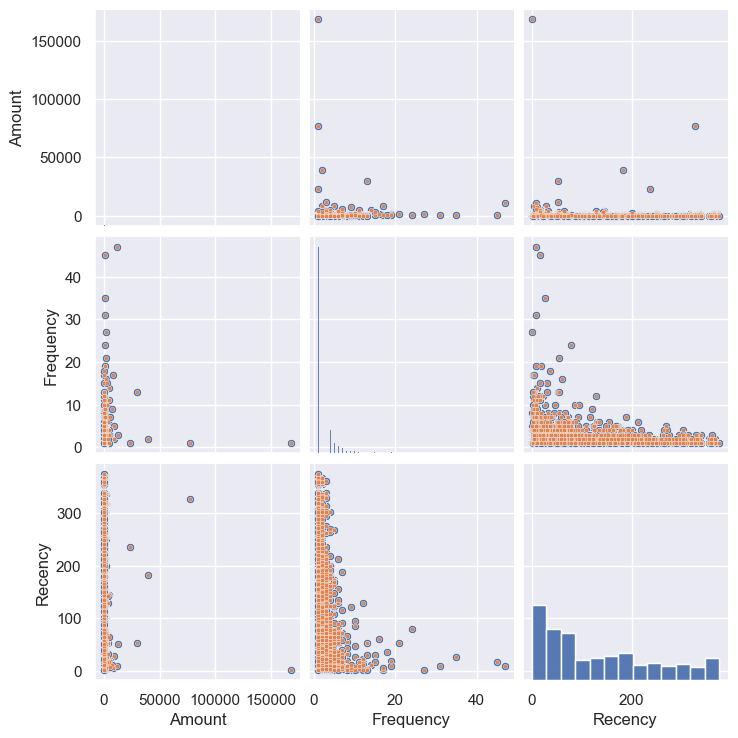

In [47]:
r = sns.pairplot(dfc[['Amount','Frequency','Recency']])
r.map_diag(sns.histplot)
r.map_offdiag(sns.scatterplot,s=10)

The pairs plot demonstrates that there is a wide range in the:  
  
>* amount of the returns with one particularly large outlier  
>* frequency of transactions  
  
These need to be investigated statistically 

### Further statistical analysis of the Returns data frame

In [48]:
dfc.describe()

,CustomerID,Amount,Frequency,Recency
count,1589.000000,1589.000000,1589.000000,1589.000000
mean,15183.020768,384.733851,2.299559,134.798615
std,1723.587032,4888.766776,3.034583,111.468906
min,12346.000000,0.420000,1.000000,1.000000
25%,13709.000000,13.350000,1.000000,36.000000
50%,15135.000000,31.600000,1.000000,102.000000
75%,16660.000000,84.100000,2.000000,213.000000
max,18282.000000,168469.600000,47.000000,374.000000


In the three features `Amount`, `Frequency` and `Recency` it is evident that there is a wide range within the features. This needs to be explored further by measuring the range of each feature. 

In [49]:
aac=calc_range(dfc['Amount'])
print(f'The range of return amount between customers is {aac}, which is a large variance')

The range of return amount between customers is 168469.18, which is a large variance


In [50]:
afc=calc_range(dfc['Frequency'])
print(f'The range of return frequency between customers is between 1 and {afc} returns')

The range of return frequency between customers is between 1 and 46 returns


In [51]:
arc=calc_range(dfc['Recency'])
print(f'The range of days since last return ranges from yesterday to {arc} days ago')

The range of days since last return ranges from yesterday to 373 days ago


## Identifying outliers, testing statistical significance and then removing identified outliers
The pair plots and the statistics of the returns data set demonstrates there is wide range between datapoints across all three variables namely `Amount`, `Frequency` and `Recency`. 

### Calculate Mahalanobis distances (Returns)
Step 1: create a function to calculate Mahalanobis distance

In [52]:
def mahalanobis(x=None, data=None, cov=None):

    x_mu = x - np.mean(dfc)
    if not cov:
        cov = np.cov(dfc.values.T)
    inv_covmat = np.linalg.inv(cov)
    left = np.dot(x_mu, inv_covmat)
    mahal = np.dot(left, x_mu.T)
    return mahal.diagonal()

Step 2: create new column in dataframe that contains Mahalanobis distance for each row

In [53]:
dfc['Mahalanobis'] = mahalanobis(x=dfc, data=dfc[['Amount', 'Frequency', 'Recency']])

Step 3: calculate p-value for each mahalanobis distance

In [54]:
dfc['p_value'] = 1 - chi2.cdf(dfc['Mahalanobis'], 2)
# degrees of freedom = k-1 , where k = number of variables. dfs has three variables therefore k = 2
dfc.head()

,CustomerID,Amount,Frequency,Recency,Mahalanobis,p_value
0,12346,77183.60,1,326,254.397962,0.000000
1,12352,960.63,3,263,4.460341,0.107510
2,12359,127.05,2,8,4.081369,0.129940
3,12362,71.65,3,12,3.788320,0.150445
4,12365,320.69,1,292,4.846393,0.088638


Step 4: Remove the outliers. An outlier is classified as any record where the  p-value is less than 0.001. The first record CustomerID = 12346 has a Recency of 326 days and a p-value of 0.000 indicating that this is a potential outlier.

In [55]:
dfc = dfc[dfc.p_value >= 0.001]
dfc.head()

,CustomerID,Amount,Frequency,Recency,Mahalanobis,p_value
1,12352,960.63,3,263,4.460341,0.107510
2,12359,127.05,2,8,4.081369,0.129940
3,12362,71.65,3,12,3.788320,0.150445
4,12365,320.69,1,292,4.846393,0.088638
5,12375,2.08,1,3,4.622022,0.099161


Step 5: Run the pair plot again and verify that that outliers have been removed from the dataset 

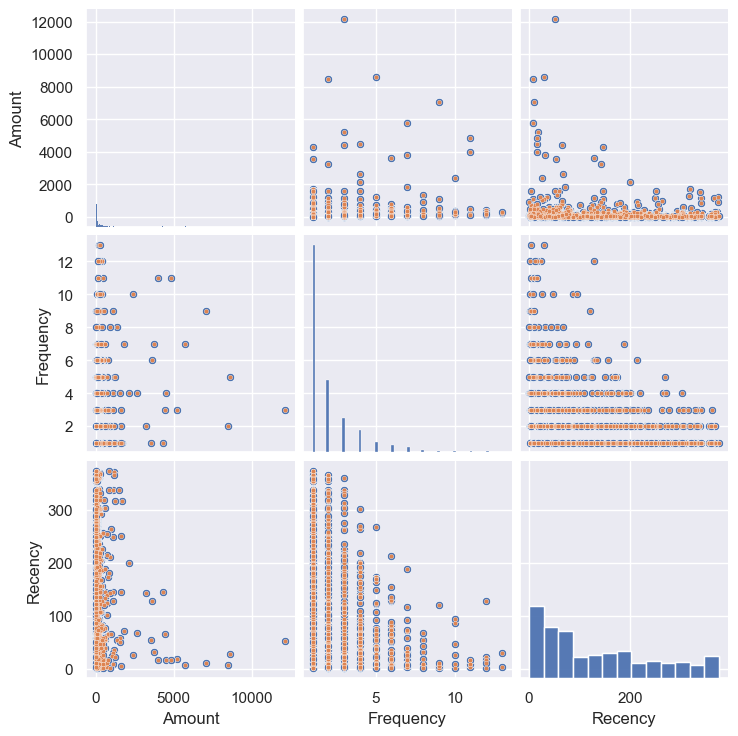

In [56]:
g = sns.pairplot(dfc[['Amount','Frequency','Recency']])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot,s=10)

## Prepare the Returns data for clustering

<div class="alert alert-block alert-warning">
<b>Note:</b> Outliers have been removed from the Returns data frame. However the problem of a wide range in the features could still be a problem. Review the descriptive statistics of the Returns data frame.
</div>

In [57]:
dfc[['Amount','Frequency','Recency']].describe().round(1)

,Amount,Frequency,Recency
count,1565.0,1565.0,1565.0
mean,151.0,2.1,136.1
std,623.7,1.8,111.4
min,0.4,1.0,1.0
25%,13.1,1.0,36.0
50%,30.6,1.0,107.0
75%,79.6,2.0,214.0
max,12158.9,13.0,374.0


### Range observations:
All three variables demonstrate a significant range in the amount and recency data that will need to be resolved.
* The standard deviation for `Amount` is `623.7`. 
* The standard deviation for `Recency` is `111.4`.
* The standard deviation for `Frequency` is `1.8`.
* k-means clustering uses Euclidean distance to quantify similarity. The problem with these three fields is iff unresolved the amount feature will dominate the distance calculations and frequency or recency will have little if any impact on the clustering process.
* The resolution is to normalise (or standardise) the data in these three fields.
* Standardisation rescales the fields to have a mean of 0 and a standard deviation of 1.

### Normalise (or standardise) the data in the three features in the Returns data frame
Use the scaler.fit_transform method from the sklearn.preprocessing subpackage to standerdise the `Amount`, `Frequency` and `Recency` fields.

In [58]:
dfcs = scaler.fit_transform(dfc[['Amount','Frequency','Recency']])
print(dfcs[0:5]) # print the first five elements in the array

[[ 1.29856358  0.52635788  1.13974446]
 [-0.03836097 -0.03098318 -1.15000912]
 [-0.12721341  0.52635788 -1.11409141]
 [ 0.27220559 -0.58832424  1.4001478 ]
 [-0.2387922  -0.58832424 -1.19490625]]


The scaler transformation returns a NumPy array that needs to be converted to a data frame (for convenience).

In [59]:
dfcs = pd.DataFrame(dfcs, columns = ['Amount','Frequency','Recency'])
dfcs.rename(columns = {'Amount':'Amount_S', 'Frequency':'Frequency_S', 'Recency':'Recency_S'}, inplace = True)
dfcs.head()

,Amount_S,Frequency_S,Recency_S
0,1.298564,0.526358,1.139744
1,-0.038361,-0.030983,-1.150009
2,-0.127213,0.526358,-1.114091
3,0.272206,-0.588324,1.400148
4,-0.238792,-0.588324,-1.194906


### The standardised values in Amount, Frequency and Recency.
Reviewing the data frame above note that `Amount`, `Frequency` and `Recency` have a standard deviation of one and a mean of zero. (The approach is Z-score normalization).  

Drop the `Mahalanobis` and `p_value` fields as they are not required for the clustering

In [60]:
dfcc = pd.merge(dfc, dfcs, left_index=True, right_index=True)

In [61]:
dfc = dfcc.drop(['Mahalanobis', 'p_value'], axis=1)
dfc.head()

,CustomerID,Amount,Frequency,Recency,Amount_S,Frequency_S,Recency_S
1,12352,960.63,3,263,-0.038361,-0.030983,-1.150009
2,12359,127.05,2,8,-0.127213,0.526358,-1.114091
3,12362,71.65,3,12,0.272206,-0.588324,1.400148
4,12365,320.69,1,292,-0.238792,-0.588324,-1.194906
5,12375,2.08,1,3,-0.239001,-0.588324,0.178946


##  Export the prepared Sales and Returns data frames to One Drive

In [62]:
#dfs.to_excel('Sales_Data.xlsx', sheet_name='Sales_Data', index=True)
#dfc.to_excel('Returns_Data.xlsx', sheet_name='Returns_Data', index=True)


## Operationalising the Model

Exporting the prepared Sales and Return data frames to One Drive is an important consideration when planning to put the model into production. Recent studies note that between 80 to 90 percent of machine learning models do not go into production (O’Neill, 2020). This project is designed to consider how it could be put into production. Therefore the ETL process has been separated from the modelling and analytical processes so that they mirror the processes at the council. Data is ingested through an ETL pipeline and the processed data tables stored on in premises  servers ready for reporting or modelling.  

Storing the prepared data frames means that there smaller more efficient tables are loaded into the machine learning model. The initial data frame was 541,909 records and 11 columns. The Sales and Returns tables have both been aggregated to the transaction level reducing the Sales data frame to 4,286 records/ 4 features and the Returns data frame to 1,565 records/4 features.


<div class="alert alert-block alert-info">
<b> </b> </div>

<h1 style="text-align: center">END Part I: ETL Pipeline and Exploratory Data Analysis</h1> 

<div class="alert alert-block alert-info">
<b> </b> </div>

#### See Part II for clustering of customer sales transactions.
https://github.com/andrewcollodel/Data-Science-Portfolio/blob/main/2_PART_II_Online_Retail_Market_Segmentation_Sales.ipynb
#### See Part III for clustering of customers who cancel or return purchases.
https://github.com/andrewcollodel/Data-Science-Portfolio/blob/main/3_PART_III_Online_Retail_Credit_Segmentation_Returns.ipynb
#### See Part IV for the Analysis of customer purchasing habits and proposed action plan
https://github.com/andrewcollodel/Data-Science-Portfolio/blob/main/4_PART_IV_Online_Retail_Market_Segmentation_Summary.ipynb

<div class="alert alert-block alert-danger">
<b> </b> </div>